## Ejercicio 2

$$\frac{dN}{dt} = -k\cdot N$$

### Resolución

$$\begin{split}
\int\frac{dN}{N} &= \int-k\cdot dt \\
\ln{|N|} &= -k\cdot t + C_1 \\
N &= e^{-k\cdot t + C_1} \\
N(t) &= C_2\cdot e^{-k\cdot t}
\end{split}$$

### Código

In [1]:
import sympy
import numpy as np 
import matplotlib.pyplot as plt
sympy.init_printing(use_latex='mathjax')

**Datos**

- t = 0 $\rightarrow$ T(0) = 100
- t = 5 $\rightarrow$ T(5) = 45

In [2]:
# Definicion de VARIABLES
# k: Constante
# t: tiempo
k, t = sympy.symbols('k t')

# Definimos la funcion y(t)
N = sympy.Function('y')(t)

# Definimos nuestra EDO
edo = sympy.Eq(N.diff(t), -k * N)

# Resolvemos la EDO con datos iniciales
solucion = sympy.dsolve(edo, N)

solucion

           -k⋅t
y(t) = C₁⋅ℯ    

In [3]:
# Resolvemos la EDO con datos iniciales
solucion = sympy.dsolve(edo, N, ics={N.subs(t, 0): 100})

solucion

            -k⋅t
y(t) = 100⋅ℯ    

In [4]:
# Devolver la parte derecha de la ecuacion
y_sol = solucion.rhs

# Resolvemos para hallar K
k_value = sympy.solve(y_sol.subs(t, 5) - 45, k)
k_value = [i for i in k_value if i.is_real]
k_value

⎡   ⎛5 ____  3/5⎞⎤
⎢   ⎜╲╱ 20 ⋅3   ⎟⎥
⎢log⎜───────────⎟⎥
⎣   ⎝     3     ⎠⎦

In [5]:
y_sol  = solucion.subs(k, float(k_value[0]))
y_sol

            -0.159701539243554⋅t
y(t) = 100⋅ℯ                    

### Gráfico

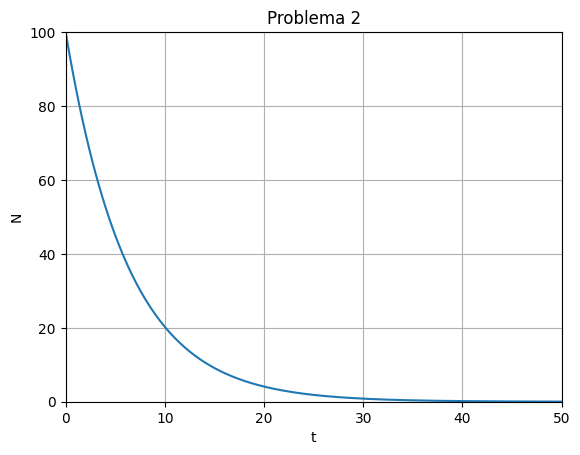

In [6]:
x_vals = np.linspace(0,50,300)
y_sol = solucion.subs(k, float(k_value[0]))
y_vals = [(y_sol.subs(t,i)).rhs for i in x_vals]
plt.plot(x_vals,y_vals, label='y(t)')
plt.xlabel('t')
plt.ylabel('N')
plt.title('Problema 2')
plt.xlim(0,50)
plt.ylim(0,100)
plt.grid()
plt.show()